In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PCOS_data_extra.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df

,Weight gain(Y/N),hair growth(Y/N),Pimples(Y/N),Fast food (Y/N),Skin darkening (Y/N),Cycle length(days),Cycle(R/I),Marraige Status (Yrs),Hip(inch),Weight (Kg),PCOS (Y/N)
0,0,0,0,1,0,5,2,7.0,36,44.6,0
1,0,0,0,0,0,5,2,11.0,38,65.0,0
2,0,0,1,1,0,5,2,10.0,40,68.8,1
3,0,0,0,0,0,5,2,4.0,42,65.0,0
4,0,0,0,0,0,5,2,1.0,37,52.0,0
...,...,...,...,...,...,...,...,...,...,...,...
536,0,0,0,0,0,5,2,8.0,28,50.0,0
537,1,0,0,0,0,5,2,4.0,34,63.2,0
538,0,0,0,0,0,6,2,8.0,30,54.0,0
539,0,0,1,0,0,2,4,2.0,28,50.0,0


In [ ]:



# Fill missing values with the mean of each column
df = df.fillna(df.mean())

# Split the data into features (X) and target (y)
X = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']
y


0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOS (Y/N), Length: 541, dtype: int64

In [ ]:
X

,Weight gain(Y/N),hair growth(Y/N),Pimples(Y/N),Fast food (Y/N),Skin darkening (Y/N),Cycle length(days),Cycle(R/I),Marraige Status (Yrs),Hip(inch),Weight (Kg)
0,0,0,0,1,0,5,2,7.0,36,44.6
1,0,0,0,0,0,5,2,11.0,38,65.0
2,0,0,1,1,0,5,2,10.0,40,68.8
3,0,0,0,0,0,5,2,4.0,42,65.0
4,0,0,0,0,0,5,2,1.0,37,52.0
...,...,...,...,...,...,...,...,...,...,...
536,0,0,0,0,0,5,2,8.0,28,50.0
537,1,0,0,0,0,5,2,4.0,34,63.2
538,0,0,0,0,0,6,2,8.0,30,54.0
539,0,0,1,0,0,2,4,2.0,28,50.0


In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/7
13/13 [==============================] - 1s 24ms/step - loss: 2.3309 - accuracy: 0.5383 - val_loss: 1.3253 - val_accuracy: 0.6912
Epoch 2/7
13/13 [==============================] - 0s 6ms/step - loss: 0.8854 - accuracy: 0.5383 - val_loss: 0.6802 - val_accuracy: 0.6912
Epoch 3/7
13/13 [==============================] - 0s 6ms/step - loss: 0.6460 - accuracy: 0.6469 - val_loss: 0.6946 - val_accuracy: 0.5074
Epoch 4/7
13/13 [==============================] - 0s 6ms/step - loss: 0.5955 - accuracy: 0.6963 - val_loss: 0.6242 - val_accuracy: 0.6765
Epoch 5/7
13/13 [==============================] - 0s 9ms/step - loss: 0.5865 - accuracy: 0.6568 - val_loss: 0.5837 - val_accuracy: 0.7132
Epoch 6/7
13/13 [==============================] - 0s 6ms/step - loss: 0.5661 - accuracy: 0.7160 - val_loss: 0.6235 - val_accuracy: 0.6985
Epoch 7/7
13/13 [==============================] - 0s 6ms/step - loss: 0.5348 - accuracy: 0.7679 - val_loss: 0.5454 - val_accuracy: 0.7426


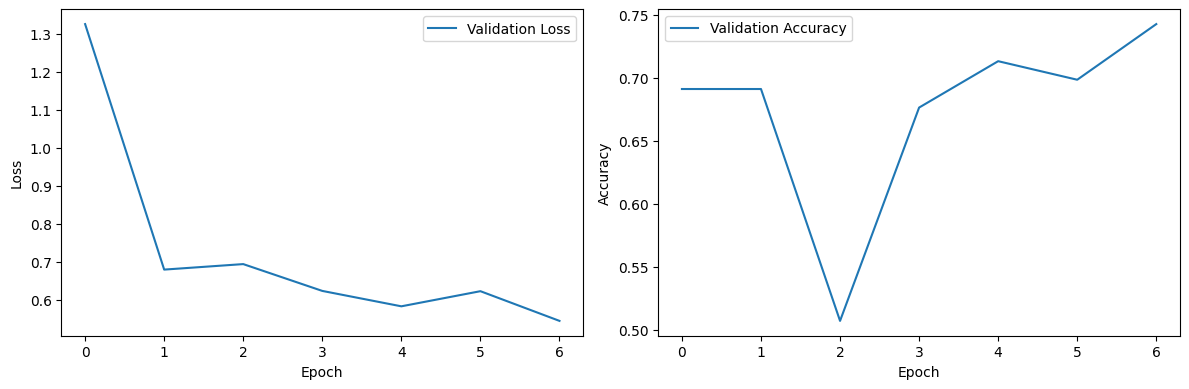

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))

# Plot validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Calculate F1 score, precision, and recall
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

5/5 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.98      0.84        94
           1       0.82      0.21      0.34        42

    accuracy                           0.74       136
   macro avg       0.78      0.60      0.59       136
weighted avg       0.76      0.74      0.69       136

F1 Score: 0.3396
Precision: 0.8182
Recall: 0.2143


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 4ms/step - loss: 0.5454 - accuracy: 0.7426
Test loss: 0.5454
Test accuracy: 0.7426
